### ESMA 3016
### Boostrapping
### Edgar Acuna

In [84]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [85]:
# Definiendo la poblacion 
x=[9,12,23,45,17,28,15,33]
# muestra de tamaño 8 SIN reemplazo 
rd.sample(x,8)

[28, 15, 17, 33, 12, 45, 23, 9]

In [86]:
#Otra manera: muestra de tamaño 8 SIN reemplazo
np.random.choice(x,8,replace=False)

array([ 9, 12, 45, 33, 17, 23, 15, 28])

### Muestra Bootstrap

In [87]:
#muestra de tamaño 8 CON reemplazo
np.random.choice(x,8)

array([28, 45, 12, 12, 23, 12, 15, 23])

###  Comparacion la distribucion Emprica con la distrbucion acumulada teorica

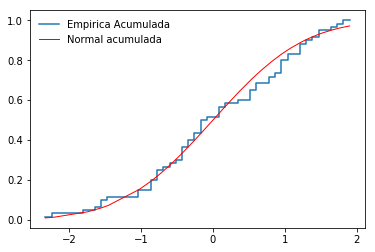

In [101]:
import numpy as np
from scipy.stats import norm 
import statsmodels.api as sm # recommended import according to the docs
import matplotlib.pyplot as plt
#Simulando una muestra de una normal de tamano n=60
sample = norm.rvs(0, 1, 60)
ecdf = sm.distributions.ECDF(sample)
x = np.linspace(min(sample), max(sample))
y = ecdf(x)
z=sorted(sample)
fig, ax = plt.subplots(1, 1)
plt.step(x, y,label="Empirica Acumulada")
ax.plot(z, norm.cdf(z), 'k-', lw=1, color='r',label='Normal acumulada')
ax.legend(loc='best', frameon=False)
plt.show()

In [102]:
#Obteniendo las medias de 10 muestras bootstrap de los datos coles
coles=[233, 259, 215, 322, 289, 220, 276, 299] 
b=[np.random.choice(coles,8).mean() for _ in range(10)] 

In [90]:
print b

[220.0, 248.0, 276.0, 220.0, 267.5, 294.0, 282.5, 220.0, 282.5, 259.0]


### Estimacion del Intervalo de Confianza usando Bootstrapping por el metodo de percentiles

In [103]:
def boot_IC_perc(data,nboot,level):
    nd=len(data)
    b=[np.random.choice(data,nd).mean() for _ in range(nboot)] 
    liminf=np.percentile(b,(100-level)/2.0)
    limsup=np.percentile(b,(100+level)/2.0)
    return liminf,limsup

In [104]:
boot_IC_perc(coles,1000,95)

(239.375, 289.26562499999994)

### Estimacion del error estandar de la Media y Mediana usando Bootstrapping

In [95]:
def stderror_boot(data,nboot,estimado="mean"):
    #Esta funcion calcula el error estándar para la media y la mediana
    # usando Bootsrapping con un numero de muestras igual a nboot. 
    nd=len(data) 
    if estimado=="mean":
        b=[np.random.choice(data,nd).mean() for _ in range(nboot)] 
    else:
        b=[np.median(np.random.choice(data,nd)) for _ in range(nboot)] 
    return np.std(b,ddof=1)

In [96]:
stderror_boot(coles,1000,"mean")

13.170314845539215

In [97]:
stderror_boot(coles,1000,estimado="median")

20.915537991633862

### Estimando el Intervalo de confianza por el metodo de Boostrapping esttudentizado

In [98]:
def boot_ICt(data,nboot,level):
    #calcula un intervalo de confianza para la media poblacional cuando la muestra x es pequeña 
    #nboot=numero de muestras bootstrap 
    import math as m
    #level=Nivel de confianza en porcentaje 
    nd=len(data)
    xmean = np.mean(data) 
    se=np.std(data,ddof=1)/m.sqrt(nd) 
    bt=[(np.mean(np.random.choice(data,nd))-xmean)*m.sqrt(nd)/np.std(np.random.choice(data,nd)) for _ in range(nboot)] 
    error1 = np.percentile(bt, (100-level)/2.0) * se
    error2 = np.percentile(bt, (100+level)/2.0) * se
    limsup=xmean+error2
    liminf=xmean+error1 
    return liminf, limsup

In [99]:
boot_ICt(coles,10,95)

(228.02464996311843, 295.18541303810525)